**Session 1 - The Assignment Problem**

There are $n$ persons who apply for $n$ jobs. Each person has a particular cost associated to a given job (different criteria: salary, time of execution, etc.). To each person exactly one job should be given.
- Person $i$ has cost $c_{i,j}$ for job $j$

**Optimal Assignment Problem**: Find the job assignment giving the smallest total cost.

**Example:** See the slides.  

**Question**: What is the cost of the bruteforce algorithm which enumerates all possible assignments? (Hint: it is related to the number of permutations of $n$ objects).


    

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">


**Part 1 - Brute force for small $n$**  

Write a brute force algorithm iterating over all possible permutations and finding the one with the smallest cost. 

a) Compute $n! = 1\times 2 \times ... \times n$ for $n=1,2,3,...,10$. Decide for which values of $n$ the brute algorithm can give results in a reasonable time. 

b) Using `itertools` print all permutations for a given list of objects. 

c) Given a $n\times n$ cost matrix $c_{i,j}$ find the permutation giving the optimal assignment.

</div>

In [2]:
import itertools
a = list(itertools.permutations([1, 2, 3]))

for i in range(0,len(a)):
    print(a[i])
    print("Accessing elements of a[i]: ",a[i][0]," ",a[i][1]," ",a[i][2])
    
    

(1, 2, 3)
Accessing elements of a[i]:  1   2   3
(1, 3, 2)
Accessing elements of a[i]:  1   3   2
(2, 1, 3)
Accessing elements of a[i]:  2   1   3
(2, 3, 1)
Accessing elements of a[i]:  2   3   1
(3, 1, 2)
Accessing elements of a[i]:  3   1   2
(3, 2, 1)
Accessing elements of a[i]:  3   2   1


In [3]:
import numpy as np
import array

max_int = 100    # upper bound for the cost
n = 3            # the number of jobs

# Create a random cost matrix
cost_matrix = np.random.randint(max_int, size=(n,n))

print(cost_matrix)

[[28 79 58]
 [52 41 98]
 [68 47  0]]


In [4]:
a = array.array('i',(i for i in range(0,n)))

L = list(itertools.permutations(a))
mincost = 1e8 # something very large
minconf = L[0]
for i in range(0,len(L)):
    cost = 0
    print(L[i])

    # ====================================
    # Compute cost for current permutation
    # compare it to the minimal cost and change the minimum if necessary

    # ====================================

print("Minimal cost=",mincost)
print("Minimal conf=",minconf)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)
Minimal cost= 100000000.0
Minimal conf= (0, 1, 2)


**The Hungarian Algorithm**

The Hungarian Algorithm solves assignment problems where $n$
  items must be assigned to  $n$
  elements.

This notebook will present a basic implementation of the Hungarian Algorithm and solve randomised problem instances.

We begin by importing numpy and generating an initial random problem instance of size  $n\times n$, `max_int` defines the maximum values created by RNG (Random Number Generator).

In [5]:
import numpy as np
import copy

#max_int = 100
#n = 3
#cost_matrix = np.random.randint(max_int, size=(n,n))

print(cost_matrix)

[[28 79 58]
 [52 41 98]
 [68 47  0]]


**Part 1 - scipy**

We can use the function `linear_sum_assignment` which is contained in `scipy` to solve the assignment problem using the Hungarian Algorithm.

In [51]:
# import scipy's linear_sum_assignment
from scipy.optimize import linear_sum_assignment

# execute the assignment
scp_assignment = linear_sum_assignment(cost_matrix)

# find the total cost
scp_total = 0
for i in range(len(scp_assignment[0])):
    scp_total += cost_matrix[scp_assignment[0][i], scp_assignment[1][i]]
print(scp_total)

152


**Part 2 - Scipy implementation and Figure** 

In this section we present a cleaner version of the previous code. We still use `scipy`, but we also produce clearer outputs and a figure to accompany the solution. The structure is separated into 4 functions: 

1. `run_assignment` - this is the main function, it runs `linear_sum_assignment` and calls supplementary functions for readability.
2. `clean_assignment` - scipy returns two arrays as a solution, containing each assignment pair
3. `calc_costs` - computes the total assignment costs.
4. `draw_network` - draws a bipartite graph with the final assignment underlined in red.


In [52]:
def draw_network(cost_matrix, assignment):
    import networkx as nx
    
    x_diff = 10
    
    y_min = 0
    y_max = 5
    
    G = nx.Graph()
    
    for i in range(len(assignment)):
        G.add_node(f"r_{i}", pos=(y_min, i*x_diff))
        G.add_node(f"c_{i}", pos=(y_max, i*x_diff))
    
    pos=nx.get_node_attributes(G,'pos')
    
    for i in range(len(assignment)):
        for j in range(len(assignment)):
            val = [i, j]
            if val in assignment:
                c = 'r'
                w = 4
            else:
                c = 'k'
                w = 2
            G.add_edge(f"r_{i}", f"c_{j}", color=c, weight=w)
            
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    nx.draw(G,pos,with_labels=True, node_size=600, font_color='w', edge_color=colors, width=weights)
    

def calc_costs(cost_matrix, assignment):
    total = 0
    for a in assignment:
        total += cost_matrix[a[0], a[1]]
    return total

def clean_assignment(row, columns):
    assignments = []
    # create pairs
    text = "The final assignment is "
    for i in range(len(row)):
        assignments.append([row[i], columns[i]])
        if i > 0:
            text += ", "
        text += f"({row[i]}, {columns[i]})"
    print(text)
    return assignments

    
def run_assignment(cost_matrix):
    row,columns = linear_sum_assignment(cost_matrix)
    assignments = clean_assignment(row, columns)
    total_cost = calc_costs(cost_matrix, assignments)
    print(f"The total cost of the assignment is {total_cost}.")
    draw_network(cost_matrix, assignments)

The final assignment is (0, 1), (1, 2), (2, 0)
The total cost of the assignment is 101.


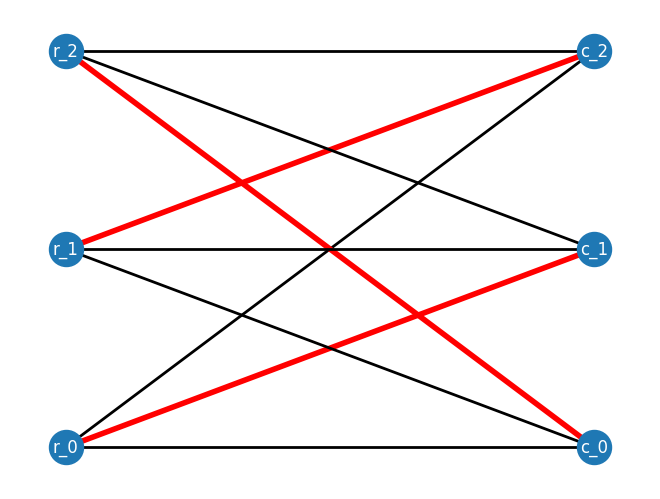

In [19]:
run_assignment(cost_matrix)


**Part 3 - Full implementation of the Hungarian Algorithm (more challenging...)**

This section presents a step-by-step implementation of the algorithm.

The algorithm has two stages, first we find the minimum value at each row, and then subtract that value to every element of the row. Then we repeat the process using the columns instead. We define this process in the function `hungarian_step` that has the cost_matrix as input.

**Goal:** read and understand the implementation.

In [20]:
def hungarian_step(mat): 
    #The for-loop iterates through every column in the matrix so we subtract this value to every element of the row
    for row_num in range(mat.shape[0]): 
        mat[row_num] = mat[row_num] - np.min(mat[row_num])
    
    #We repeat the process for the columns
    for col_num in range(mat.shape[1]): 
        mat[:,col_num] = mat[:,col_num] - np.min(mat[:,col_num])
    
    return mat

The next step, while easy to carry out visually, becomes more difficult to code. We need to find the row containing the least number of zeros first.

The first step to do this is to define a function that finds the minimum number of rows to mark that contain a zero value, let's call this min_zeros. Let's assume that the matrix being input is boolean with True where 0 existed and False where non-zero.

Now, mark the column and row as False and repeat, saving the information where the last zero value was retrieved.

By repeating this process, we collect all zeros in the matrix.

In [21]:
def min_zeros(zero_mat, mark_zero):
    # min_row = [number of zeros, row index number]
    min_row = [99999, -1]

    for row_num in range(zero_mat.shape[0]): 
        if np.sum(zero_mat[row_num] == True) > 0 and min_row[0] > np.sum(zero_mat[row_num] == True):
            min_row = [np.sum(zero_mat[row_num] == True), row_num]

    # Marked the specific row and column as False
    zero_index = np.where(zero_mat[min_row[1]] == True)[0][0]
    mark_zero.append((min_row[1], zero_index))
    zero_mat[min_row[1], :] = False
    zero_mat[:, zero_index] = False

Now that we extracted the zeros in the matrix, we can mark the rows and columns to determine whether the hungarian algorithm is complete.



In [22]:
def mark_matrix(mat):
    #Transform the matrix to boolean matrix(0 = True, others = False)
    cur_mat = mat
    zero_bool_mat = (cur_mat == 0)
    zero_bool_mat_copy = zero_bool_mat.copy()

    #Recording possible answer positions by marked_zero
    marked_zero = []
    while (True in zero_bool_mat_copy):
        min_zeros(zero_bool_mat_copy, marked_zero)

    #Recording the row and column indexes seperately.
    marked_zero_row = []
    marked_zero_col = []
    for i in range(len(marked_zero)):
        marked_zero_row.append(marked_zero[i][0])
        marked_zero_col.append(marked_zero[i][1])
    
    # mark rows not containing zeros
    non_marked_row = list(set(range(cur_mat.shape[0])) - set(marked_zero_row))
    
    # mark columns with zeros
    marked_cols = []
    check_switch = True
    while check_switch:
        check_switch = False
        for i in range(len(non_marked_row)):
            row_array = zero_bool_mat[non_marked_row[i], :]
            for j in range(row_array.shape[0]):
                if row_array[j] == True and j not in marked_cols:

                    marked_cols.append(j)
                    check_switch = True

        for row_num, col_num in marked_zero:
            if row_num not in non_marked_row and col_num in marked_cols:
                
                non_marked_row.append(row_num)
                check_switch = True
    
    # mark rows with zeros
    marked_rows = list(set(range(mat.shape[0])) - set(non_marked_row))
    
    return(marked_zero, marked_rows, marked_cols)

In the case where marked rows and columns do not add up to $n$, we need to adjust the matrix to continue the search.


In [23]:
def adjust_matrix(mat, cover_rows, cover_cols):
    cur_mat = mat
    non_zero_element = []
    
    # find the minimum value of an element not in a marked column/row 
    for row in range(len(cur_mat)):
        if row not in cover_rows:
            for i in range(len(cur_mat[row])):
                if i not in cover_cols:
                    non_zero_element.append(cur_mat[row][i])
    
    min_num = min(non_zero_element)

    # substract to all values not in a marked row/column
    for row in range(len(cur_mat)):
        if row not in cover_rows:
            for i in range(len(cur_mat[row])):
                if i not in cover_cols:
                    cur_mat[row, i] = cur_mat[row, i] - min_num
    # add to all values in marked rows/column
    for row in range(len(cover_rows)):  
        for col in range(len(cover_cols)):
            cur_mat[cover_rows[row], cover_cols[col]] = cur_mat[cover_rows[row], cover_cols[col]] + min_num

    return cur_mat

We can now put it all together into a single function:

In [24]:
def hungarian_algorithm(cost_matrix):
    n = cost_matrix.shape[0]
    cur_mat = copy.deepcopy(cost_matrix)
    
    cur_mat = hungarian_step(cur_mat)
    
    count_zero_lines = 0
        
    while count_zero_lines < n:
        ans_pos, marked_rows, marked_cols = mark_matrix(cur_mat)
        count_zero_lines = len(marked_rows) + len(marked_cols)

        if count_zero_lines < n:
            cur_mat = adjust_matrix(cur_mat, marked_rows, marked_cols)
    
        return ans_pos

In [25]:
assignment = hungarian_algorithm(cost_matrix)
print(f"The final assignment is: {assignment}")
print(cost_matrix)

The final assignment is: [(0, 1), (1, 2), (2, 0)]
[[57 17 32]
 [91 83 70]
 [14 57 87]]


In [26]:
total = 0
for i in range(len(assignment)):
    total += cost_matrix[assignment[i][0], assignment[i][1]]
print(f"The total cost of the assignment is {total}")

The total cost of the assignment is 101
